## **Análise transação de vendas semanal**

## Fonte de dados: Sales_Transactions_Dataset_Weekly.csv

Este banco de dados contém o valor de transações em vendas de alguns produtos durante 52 semanas. 
Iremos analisar as séries temporais das transações.

Colunas:
Product_Code: código do produto
W[0-51]: valor de transação da semana
"""

In [33]:
## 1: Transforme o data frame do formato wide para long 
##(Aplicar função para transformar o dado W[0-51] em dia da semana disponibilizada no arquivo.

In [34]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import random
import matplotlib.pyplot as plt

In [35]:
#importando base
sales = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

In [36]:
sales.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [37]:
#excluindo colunas adicionais

sem_normalized = sales.iloc[:,0:53]

In [38]:
#mudando os dados de wide para long

melted_sales = sem_normalized.melt(id_vars=['Product_Code'],var_name ="Week", value_name='Qtdade')
melted_sales

,Product_Code,Week,Qtdade
0,P1,W0,11
1,P2,W0,7
2,P3,W0,7
3,P4,W0,12
4,P5,W0,8
...,...,...,...
42167,P815,W51,0
42168,P816,W51,5
42169,P817,W51,3
42170,P818,W51,0


In [39]:
#transformar o dado W[0-51] em dia da semana

def transform_to_date(week_code: str) -> date:
    """
    :param week_code: Código do dia da semana
    :type week_code: string

    Return:
        date: Dia de referencia da semana (começando em 01/01/2022)
    """

    week_add = int(week_code.split('W')[1])
    return date(2022, 1, 1) + timedelta(weeks=week_add)

In [40]:
melted_sales['Week'] = melted_sales['Week'].apply(transform_to_date)
melted_sales.head()

,Product_Code,Week,Qtdade
0,P1,2022-01-01,11
1,P2,2022-01-01,7
2,P3,2022-01-01,7
3,P4,2022-01-01,12
4,P5,2022-01-01,8


In [41]:
# Exercício 1

## 2:Escolha três produtos (de forma aleatória; pode utilizar semente) e 
## construa um gráfico com o valor de transação de cada um dos produtos selecionados ao longo do tempo

In [42]:
#escolhendo 3 produtos

lista = melted_sales['Product_Code'].tolist()
lista

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'P38',
 'P39',
 'P40',
 'P41',
 'P42',
 'P43',
 'P44',
 'P45',
 'P46',
 'P47',
 'P48',
 'P49',
 'P50',
 'P51',
 'P52',
 'P53',
 'P54',
 'P55',
 'P56',
 'P57',
 'P58',
 'P59',
 'P60',
 'P61',
 'P62',
 'P63',
 'P64',
 'P65',
 'P66',
 'P67',
 'P68',
 'P69',
 'P70',
 'P71',
 'P72',
 'P73',
 'P74',
 'P75',
 'P76',
 'P77',
 'P78',
 'P79',
 'P80',
 'P81',
 'P82',
 'P83',
 'P84',
 'P85',
 'P86',
 'P87',
 'P88',
 'P89',
 'P90',
 'P91',
 'P92',
 'P93',
 'P94',
 'P95',
 'P96',
 'P97',
 'P98',
 'P99',
 'P100',
 'P101',
 'P102',
 'P103',
 'P104',
 'P105',
 'P106',
 'P107',
 'P108',
 'P109',
 'P110',
 'P111',
 'P112',
 'P113',
 'P114',
 'P115',
 'P116',
 'P117',
 'P118',
 'P119',
 'P120',
 'P121',
 'P122',
 'P123',
 

In [43]:
#escolhendo 3 produtos
random.seed(0)
produtos = lista
aleatorios = random.sample(produtos, 3)    
for produto in aleatorios:
    print(produto)

P107
P808
P221


In [44]:
# filtrando somente os 3 produtos escolhidos
produtos_escolhidos = ['P107', 'P808', 'P221']

produto_107 = melted_sales[(melted_sales['Product_Code'] == 'P107')]
produto_221 = melted_sales[(melted_sales['Product_Code'] == 'P221')]
produto_808 = melted_sales[(melted_sales['Product_Code'] == 'P808')]

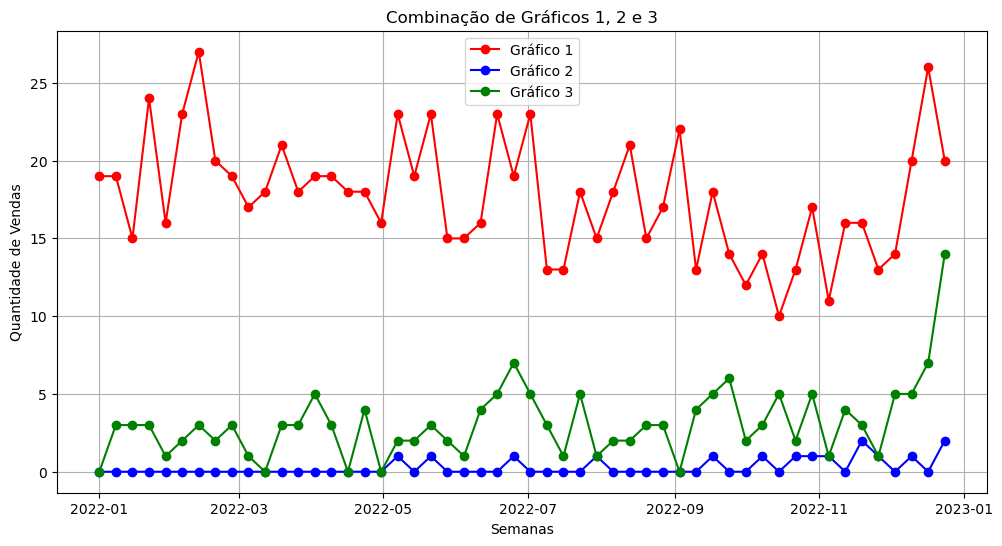

In [45]:
# construindo um gráfico combinado

plt.figure(figsize=(12, 6))

plt.plot(produto_107['Week'], produto_107['Qtdade'], marker='o', linestyle='-', color = 'red', label="Gráfico 1")

plt.plot(produto_221['Week'], produto_221['Qtdade'], marker='o', linestyle='-', color = 'blue', label="Gráfico 2")

plt.plot(produto_808['Week'], produto_808['Qtdade'], marker='o', linestyle='-', color = 'green', label="Gráfico 3")

# Combinar os gráficos em um único gráfico
plt.xlabel('Semanas')
plt.ylabel('Quantidade de Vendas')
plt.title('Combinação de Gráficos 1, 2 e 3')
plt.legend()
plt.grid(True)

# Mostrar o gráfico combinado
plt.show()

In [46]:
## 3. Por produto calcule a diferença entre as semanas e gere um gráfico da série
## temporal da diferença ao longo das semanas

In [47]:
# criando uma coluna com a diferença da última semana
melted_sales['Diferenca_Semanal'] = melted_sales.groupby('Product_Code')['Qtdade'].diff()
melted_sales

,Product_Code,Week,Qtdade,Diferenca_Semanal
0,P1,2022-01-01,11,NaN
1,P2,2022-01-01,7,NaN
2,P3,2022-01-01,7,NaN
3,P4,2022-01-01,12,NaN
4,P5,2022-01-01,8,NaN
...,...,...,...,...
42167,P815,2022-12-24,0,-2.0
42168,P816,2022-12-24,5,-1.0
42169,P817,2022-12-24,3,-1.0
42170,P818,2022-12-24,0,-2.0


In [48]:
# filtrando sobre os produtos de escolha
produtos_filtrados = melted_sales.loc[melted_sales['Product_Code'].isin(produtos_escolhidos)]
produtos_filtrados

,Product_Code,Week,Qtdade,Diferenca_Semanal
106,P107,2022-01-01,19,NaN
220,P221,2022-01-01,0,NaN
799,P808,2022-01-01,0,NaN
917,P107,2022-01-08,19,0.0
1031,P221,2022-01-08,0,0.0
...,...,...,...,...
40770,P221,2022-12-17,0,-1.0
41349,P808,2022-12-17,7,2.0
41467,P107,2022-12-24,20,-6.0
41581,P221,2022-12-24,2,2.0


In [49]:
produtos_filtrados_copia = produtos_filtrados.copy()

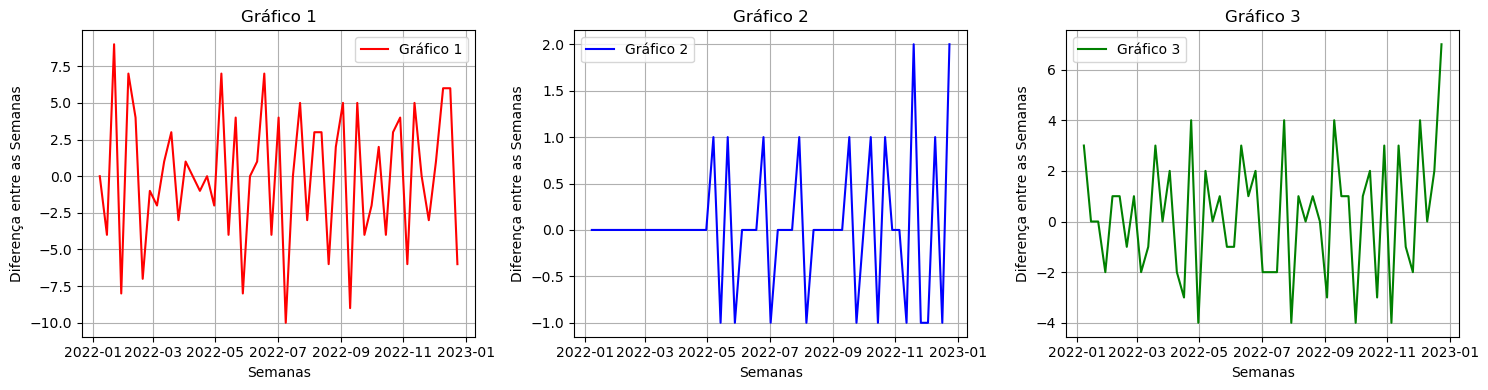

In [50]:
## gerando um gráfico da série temporal da diferença ao longo das semanas

produto_1 = produtos_filtrados_copia[(produtos_filtrados['Product_Code'] == 'P107')]
produto_2 = produtos_filtrados_copia[(produtos_filtrados['Product_Code'] == 'P221')]
produto_3 = produtos_filtrados_copia[(produtos_filtrados['Product_Code'] == 'P808')]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plotar o Gráfico 1 no primeiro subplot
axes[0].plot(produto_1['Week'], produto_1['Diferenca_Semanal'], label="Gráfico 1", color='red')
axes[0].set_title('Gráfico 1')

# Plotar o Gráfico 2 no segundo subplot
axes[1].plot(produto_2['Week'], produto_2['Diferenca_Semanal'], label="Gráfico 2", color='blue')
axes[1].set_title('Gráfico 2')

# Plotar o Gráfico 3 no terceiro subplot
axes[2].plot(produto_3['Week'], produto_3['Diferenca_Semanal'], label="Gráfico 3", color='green')
axes[2].set_title('Gráfico 3')

# Adicionar legendas e rótulos de eixo
for ax in axes:
    ax.set_xlabel('Semanas')
    ax.set_ylabel('Diferença entre as Semanas')
    ax.legend()
    ax.grid(True)

# Ajustar os subplots para evitar sobreposição
plt.tight_layout()

# Mostrar a figura combinada
plt.show()

In [51]:
## 4. Calcule as descritivas de cada produto (média, desvio-padrão, mínimo, mediana, máximo)
descritivas_por_produto = produtos_filtrados.groupby('Product_Code')['Qtdade'].describe()
descritivas_por_produto.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', '50%': 'Mediana', 'max': 'Máximo'}, inplace=True)
descritivas_por_produto

,count,Média,Desvio Padrão,Mínimo,25%,Mediana,75%,Máximo
Product_Code,,,,,,,,
P107,52.0,17.711538,3.821182,10.0,15.0,18.0,20.00,27.0
P221,52.0,0.288462,0.536384,0.0,0.0,0.0,0.25,2.0
P808,52.0,3.115385,2.356916,0.0,2.0,3.0,4.25,14.0


In [52]:
## 5.Calcule a média móvel de cada 3 semanas e 
## gere um gráfico contendo as médias móveis de um produto.

In [53]:
# Calcular a média móvel de 3 semanas para cada produto

produtos_filtrados_copia['Media_Movel'] = produtos_filtrados_copia['Qtdade'].rolling(window=3).mean()
produtos_filtrados_copia

,Product_Code,Week,Qtdade,Diferenca_Semanal,Media_Movel
106,P107,2022-01-01,19,NaN,NaN
220,P221,2022-01-01,0,NaN,NaN
799,P808,2022-01-01,0,NaN,6.333333
917,P107,2022-01-08,19,0.0,6.333333
1031,P221,2022-01-08,0,0.0,6.333333
...,...,...,...,...,...
40770,P221,2022-12-17,0,-1.0,10.333333
41349,P808,2022-12-17,7,2.0,11.000000
41467,P107,2022-12-24,20,-6.0,9.000000
41581,P221,2022-12-24,2,2.0,9.666667


In [54]:
# escolhendo um produto

produto_choice = produtos_filtrados_copia[(produtos_filtrados['Product_Code'] == 'P107')]
produto_choice

,Product_Code,Week,Qtdade,Diferenca_Semanal,Media_Movel
106,P107,2022-01-01,19,NaN,NaN
917,P107,2022-01-08,19,0.0,6.333333
1728,P107,2022-01-15,15,-4.0,6.000000
2539,P107,2022-01-22,24,9.0,9.000000
3350,P107,2022-01-29,16,-8.0,6.333333
4161,P107,2022-02-05,23,7.0,8.000000
4972,P107,2022-02-12,27,4.0,9.666667
5783,P107,2022-02-19,20,-7.0,7.666667
6594,P107,2022-02-26,19,-1.0,7.000000
7405,P107,2022-03-05,17,-2.0,6.666667


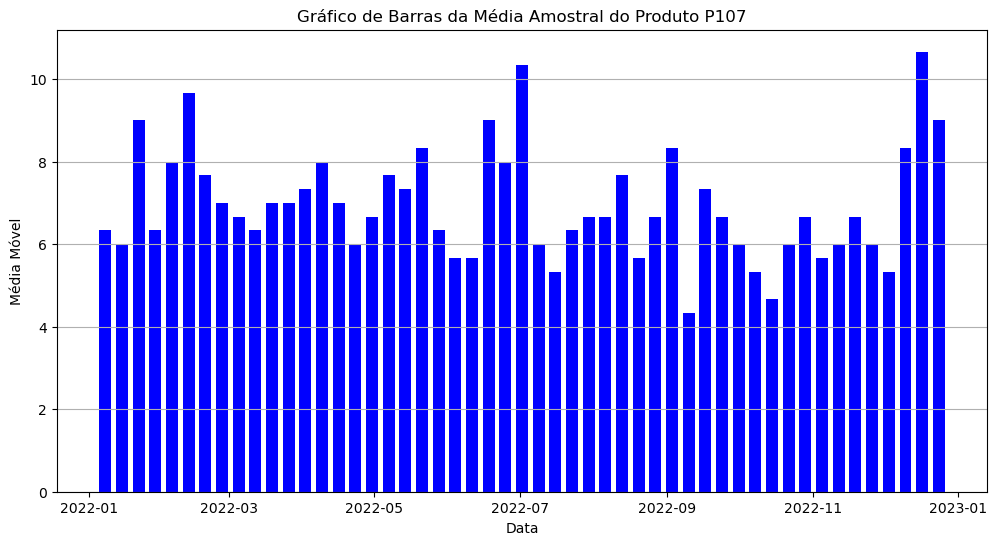

In [55]:
# gerando um gráfico contendo as médias móveis de um produto.

plt.figure(figsize=(12, 6))
plt.bar(produto_choice['Week'], produto_choice['Media_Movel'], color='blue',width=5)
plt.title('Gráfico de Barras da Média Amostral do Produto P107')
plt.xlabel('Data')
plt.ylabel('Média Móvel')
plt.grid(axis='y')
plt.show()